In [1]:
#step 1: import packages

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
import seaborn as sns

### Matches DF Cleaning

In [2]:
#step 2: read in WorldCupMatches
matches = pd.read_csv('../data/WorldCupMatches.csv')

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [4]:
matches.shape

(4572, 20)

In [5]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
#Year column to numeric
matches['Year'] = pd.to_numeric(matches['Year'])

In [7]:
#Drop duplicates and NAs
matches = matches.drop_duplicates().dropna()
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [8]:
matches.shape

(835, 20)

In [9]:
matches['Year'].max()

2014.0

In [10]:
list(np.unique(matches['Home Team Name']))

['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Ecuador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iran',
 'Iraq',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'Uruguay',
 'Wales',
 'Yugoslavia',
 'Zaire',
 'rn">Bosnia and Herzegovina',
 'rn">Republic of Ireland',
 'rn">Serbia and Monte

In [11]:
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="C�te d'Ivoire", "Cote d'Ivoire", matches['Home Team Name'])
#matches['Home Team Name'] = np.where(matches['Home Team Name'] =="German DR", "Germany", matches['Home Team Name'])
#matches['Home Team Name'] = np.where(matches['Home Team Name'] =="Germany FR", "Germany", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="IR Iran", "Iran", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="IR Iran", "Iran", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="Korea DPR", "North Korea", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="Korea Republic", "South Korea", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">Bosnia and Herzegovina', "Bosnia and Herzegovina", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">Republic of Ireland', "Republic of Ireland", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">Serbia and Montenegro', "Serbia and Montenegro", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">Trinidad and Tobago', "Trinidad and Tobago", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">United Arab Emirates', "United Arab Emirated", matches['Home Team Name'])
list(np.unique(matches['Home Team Name']))


['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Ecuador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iran',
 'Iraq',
 'Italy',
 'Jamaica',
 'Japan',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Korea',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Serbia and Montenegro',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'United Arab Emirated',
 'Uruguay',
 'W

In [12]:
matches['combo']=matches['Home Team Initials'] +'-' + matches['Home Team Name']
list(np.unique(matches['combo']))

['ALG-Algeria',
 'ANG-Angola',
 'ARG-Argentina',
 'AUS-Australia',
 'AUT-Austria',
 'BEL-Belgium',
 'BIH-Bosnia and Herzegovina',
 'BOL-Bolivia',
 'BRA-Brazil',
 'BUL-Bulgaria',
 'CAN-Canada',
 'CHI-Chile',
 'CHN-China PR',
 "CIV-Cote d'Ivoire",
 'CMR-Cameroon',
 'COL-Colombia',
 'CRC-Costa Rica',
 'CRO-Croatia',
 'CUB-Cuba',
 'CZE-Czech Republic',
 'DEN-Denmark',
 'ECU-Ecuador',
 'ENG-England',
 'ESP-Spain',
 'FRA-France',
 'FRG-Germany FR',
 'GDR-German DR',
 'GER-Germany',
 'GHA-Ghana',
 'GRE-Greece',
 'HAI-Haiti',
 'HON-Honduras',
 'HUN-Hungary',
 'IRL-Republic of Ireland',
 'IRN-Iran',
 'IRQ-Iraq',
 'ITA-Italy',
 'JAM-Jamaica',
 'JPN-Japan',
 'KOR-South Korea',
 'KSA-Saudi Arabia',
 'MAR-Morocco',
 'MEX-Mexico',
 'NED-Netherlands',
 'NGA-Nigeria',
 'NIR-Northern Ireland',
 'NOR-Norway',
 'NZL-New Zealand',
 'PAR-Paraguay',
 'PER-Peru',
 'POL-Poland',
 'POR-Portugal',
 'PRK-North Korea',
 'ROU-Romania',
 'RSA-South Africa',
 'RUS-Russia',
 'SCG-Serbia and Montenegro',
 'SCO-Scotlan

In [13]:
list(np.unique(matches['Away Team Name']))

['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Dutch East Indies',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Kuwait',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'Uruguay',
 'Wales',
 'Yugoslavia',
 'Zaire',
 'rn">Bosni

In [14]:
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="C�te d'Ivoire", "Cote d'Ivoire", matches['Home Team Name'])
#matches['Home Team Name'] = np.where(matches['Home Team Name'] =="German DR", "Germany", matches['Home Team Name'])
#matches['Home Team Name'] = np.where(matches['Home Team Name'] =="Germany FR", "Germany", matches['Home Team Name'])
#matches['Away Team Name'] = np.where(matches['Away Team Name'] =="IR Iran", "Iran", matches['Home Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="IR Iran", "Iran", matches['Home Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="Korea DPR", "North Korea", matches['Home Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="Korea Republic", "South Korea", matches['Home Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">Bosnia and Herzegovina', "Bosnia and Herzegovina", matches['Home Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">Republic of Ireland', "Republic of Ireland", matches['Home Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">Serbia and Montenegro', "Serbia and Montenegro", matches['Home Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">Trinidad and Tobago', "Trinidad and Tobago", matches['Home Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">United Arab Emirates', "United Arab Emirated", matches['Home Team Name'])
list(np.unique(matches['Away Team Name']))


['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Ecuador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iran',
 'Iraq',
 'Italy',
 'Jamaica',
 'Japan',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Korea',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Serbia and Montenegro',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'United Arab Emirated',
 'Uruguay',
 'W

### Players DF Cleaning

In [15]:
#step 2: read in WorldCupPlayers
players = pd.read_csv('../data/WorldCupPlayers.csv')

In [16]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [17]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [18]:
players.shape

(37784, 9)

### Cups DF Cleaning

In [19]:
#step 2: read in WorldCups
cups = pd.read_csv('../data/WorldCups.csv')

In [20]:
cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [21]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [22]:
cups.drop_duplicates().dropna()


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [23]:
np.unique(cups['Country'])

array(['Argentina', 'Brazil', 'Chile', 'England', 'France', 'Germany',
       'Italy', 'Korea/Japan', 'Mexico', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'USA', 'Uruguay'], dtype=object)

In [24]:
np.unique(cups['Winner'])

array(['Argentina', 'Brazil', 'England', 'France', 'Germany',
       'Germany FR', 'Italy', 'Spain', 'Uruguay'], dtype=object)

In [25]:
cups['Winner'] = np.where(cups['Winner']=='Germany FR', 'Germany', cups['Winner'])

In [26]:
np.unique(cups['Runners-Up'])

array(['Argentina', 'Brazil', 'Czechoslovakia', 'France', 'Germany',
       'Germany FR', 'Hungary', 'Italy', 'Netherlands', 'Sweden'],
      dtype=object)

In [27]:
cups['Runners-Up'] = np.where(cups['Runners-Up']=='Germany FR', 'Germany', cups['Runners-Up'])

In [28]:
np.unique(cups['Third'])

array(['Austria', 'Brazil', 'Chile', 'Croatia', 'France', 'Germany',
       'Germany FR', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Sweden', 'Turkey', 'USA'], dtype=object)

In [29]:
cups['Third'] = np.where(cups['Third']=='Germany FR', 'Germany', cups['Third'])

# ANALYSIS

### Q1.) Was there a specific referee that had the away team advantage?

### Q2.) Which are the top 5 countries who have won the greatest number of FIFA World Cups? Create visuals for the findings.

In [30]:
winners = cups[['Country','Winner']]
winners

,Country,Winner
0,Uruguay,Uruguay
1,Italy,Italy
2,France,Italy
3,Brazil,Uruguay
4,Switzerland,Germany
5,Sweden,Brazil
6,Chile,Brazil
7,England,England
8,Mexico,Brazil
9,Germany,Germany


In [31]:
top5 = winners.value_counts('Winner').head(5).reset_index()
top5

,Winner,count
0,Brazil,5
1,Germany,4
2,Italy,4
3,Argentina,2
4,Uruguay,2


In [32]:
top5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Winner  5 non-null      object
 1   count   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


Text(0.5, 1.0, 'Top 5 World Cup Champions')

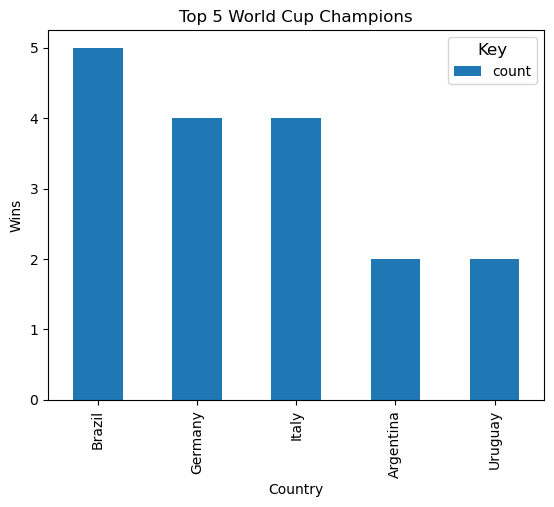

In [33]:
top5.plot.bar(x='Winner',
              y='count')
plt.legend(title='Key', fontsize=10, title_fontsize=12)
plt.xlabel('Country')
plt.ylabel('Wins')
plt.title('Top 5 World Cup Champions') 

### Q3.) How many goals were scored each season? What percentage of total goals were scored by the winning team in each season?

In [34]:
total_goals = cups[['Year','Winner','GoalsScored']]
#rename Columns
total_goals = total_goals.rename(columns={'Year':'Year','Winner':'Winner','GoalsScored':'Total Goals'})
total_goals

,Year,Winner,Total Goals
0,1930,Uruguay,70
1,1934,Italy,70
2,1938,Italy,84
3,1950,Uruguay,88
4,1954,Germany,140
5,1958,Brazil,126
6,1962,Brazil,89
7,1966,England,89
8,1970,Brazil,95
9,1974,Germany,97


In [35]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 835
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  835 non-null    float64
 1   Datetime              835 non-null    object 
 2   Stage                 835 non-null    object 
 3   Stadium               835 non-null    object 
 4   City                  835 non-null    object 
 5   Home Team Name        835 non-null    object 
 6   Home Team Goals       835 non-null    float64
 7   Away Team Goals       835 non-null    float64
 8   Away Team Name        835 non-null    object 
 9   Win conditions        835 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  835 non-null    float64
 12  Half-time Away Goals  835 non-null    float64
 13  Referee               835 non-null    object 
 14  Assistant 1           835 non-null    object 
 15  Assistant 2           835 no

In [45]:
home_goals = matches[['Year','Home Team Name','Home Team Goals','RoundID','MatchID','Home Team Initials']]
home_goals = home_goals.rename(columns={'Year':'Year','Home Team Name':'home_team','Home Team Goals':'HT_goals', 'Home Team Initials':'HT_initials'})
home_goals
#away_goals = matches[['Year','Away Team Name','Away Team Goals','RoundID','MatchID']]
#away_goals = away_goals.rename(columns={'Year':'Year','Away Team Name':'away_team','Away Team Goals':'AT_goals'})
#goals = home_goals.append(away_goals)
#goals

,Year,home_team,HT_goals,RoundID,MatchID,HT_initials
0,1930.0,France,4.0,201.0,1096.0,FRA
1,1930.0,USA,3.0,201.0,1090.0,USA
2,1930.0,Yugoslavia,2.0,201.0,1093.0,YUG
3,1930.0,Romania,3.0,201.0,1098.0,ROU
4,1930.0,Argentina,1.0,201.0,1085.0,ARG
...,...,...,...,...,...,...
831,2014.0,Argentina,1.0,255953.0,300186504.0,ARG
832,2014.0,Netherlands,2.0,255951.0,300186508.0,NED
833,2014.0,Costa Rica,1.0,255951.0,300186459.0,CRC
834,2014.0,Argentina,1.0,255951.0,300186503.0,ARG


In [46]:
away_goals = matches[['Year','Away Team Name','Away Team Goals','RoundID','MatchID', 'Away Team Initials']]
away_goals = away_goals.rename(columns={'Year':'Year','Away Team Name':'away_team','Away Team Goals':'AT_goals', 'Away Team Initials':'AT_initials'})
away_goals

,Year,away_team,AT_goals,RoundID,MatchID,AT_initials
0,1930.0,France,1.0,201.0,1096.0,MEX
1,1930.0,USA,0.0,201.0,1090.0,BEL
2,1930.0,Yugoslavia,1.0,201.0,1093.0,BRA
3,1930.0,Romania,1.0,201.0,1098.0,PER
4,1930.0,Argentina,0.0,201.0,1085.0,FRA
...,...,...,...,...,...,...
831,2014.0,Argentina,0.0,255953.0,300186504.0,BEL
832,2014.0,Netherlands,1.0,255951.0,300186508.0,MEX
833,2014.0,Costa Rica,1.0,255951.0,300186459.0,GRE
834,2014.0,Argentina,0.0,255951.0,300186503.0,SUI


In [51]:
goals = home_goals.append(away_goals)

AttributeError: 'DataFrame' object has no attribute 'append'